### Exercise Translation

#### **Level 1**
##### a)
1. Perform a regression using the Boston Housing dataset. The data is located in the task folder.  
   Both files should be loaded using `np.loadtxt`.  
2. Import the `train_test_split` function from `sklearn.model_selection`.  
3. Compare the performance of the predefined classes `LinearRegression`, `Ridge`, and `Lasso` based on their scores.  
4. Does the score change when applying standard scaling beforehand?  
5. Does the score change when using MinMax scaling?  

In [ ]:
import numpy as np

# Load the datasets
features_db = np.loadtxt("BostonFeature.csv", delimiter=',')
target_db = np.loadtxt("BostonTarget.csv", delimiter=',')

# Check if correctly imported, type and size of data sets
print(type(features_db))
print(features_db.shape)
print(features_db[:5])

print(type(target_db))
print(target_db.shape)
print(target_db[:5])

# Perform exploratory analysis on basic parameters checking if any NaN
nan_count = np.isnan(features_db).sum(axis=0)
sorted_indices = np.argsort(nan_count)
sorted_nan_count = nan_count[sorted_indices]

print("\nNaN Counts per Column (sorted):")
print(sorted_nan_count)


<class 'numpy.ndarray'>
(506, 12)
[[6.3200e-03 1.8000e+01 2.3100e+00 0.0000e+00 5.3800e-01 6.5750e+00
  6.5200e+01 4.0900e+00 1.0000e+00 2.9600e+02 1.5300e+01 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 6.4210e+00
  7.8900e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 7.1850e+00
  6.1100e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 4.0300e+00]
 [3.2370e-02 0.0000e+00 2.1800e+00 0.0000e+00 4.5800e-01 6.9980e+00
  4.5800e+01 6.0622e+00 3.0000e+00 2.2200e+02 1.8700e+01 2.9400e+00]
 [6.9050e-02 0.0000e+00 2.1800e+00 0.0000e+00 4.5800e-01 7.1470e+00
  5.4200e+01 6.0622e+00 3.0000e+00 2.2200e+02 1.8700e+01 5.3300e+00]]
<class 'numpy.ndarray'>
(506,)
[24.  21.6 34.7 33.4 36.2]

NaN Counts per Column (sorted):
[0 0 0 0 0 0 0 0 0 0 0 0]


In [15]:
# Import train_test_split and split the data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_db, target_db, random_state=42)

# Standardize the data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Linear Regression (No Scaling) Mean R2: 0.7102
Linear Regression (With Scaling) Mean R2: 0.7102
Ridge (α=1.0) (No Scaling) Mean R2: 0.7079
Ridge (α=1.0) (With Scaling) Mean R2: 0.7105
Lasso (α=0.1) (No Scaling) Mean R2: 0.6969
Lasso (α=0.1) (With Scaling) Mean R2: 0.7065


C:\Users\felip\AppData\Local\Temp\ipykernel_19880\4254811959.py:28: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(results, labels=[f"{key} (No Scaling)" for key in models.keys()] +


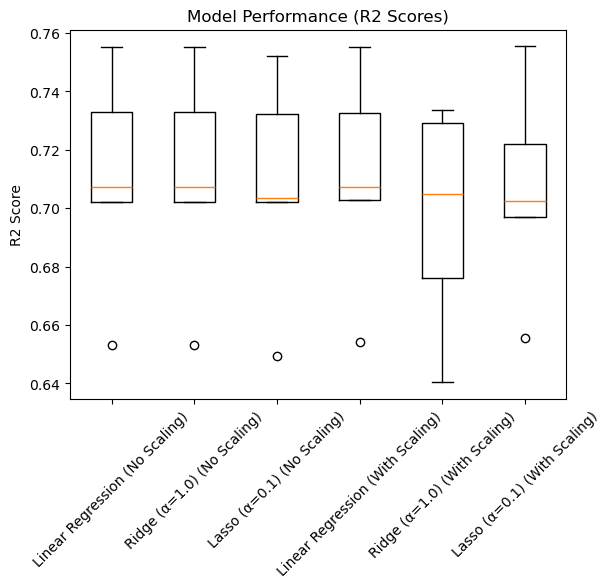


Test Set Results:
Linear Regression Test Set R2 (No Scaling): 0.7080
Linear Regression Test Set R2 (With Scaling): 0.7080
Ridge (α=1.0) Test Set R2 (No Scaling): 0.7022
Ridge (α=1.0) Test Set R2 (With Scaling): 0.7074
Lasso (α=0.1) Test Set R2 (No Scaling): 0.6885
Lasso (α=0.1) Test Set R2 (With Scaling): 0.6867


In [16]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge (α=1.0)": Ridge(alpha=1.0),
    "Lasso (α=0.1)": Lasso(alpha=0.1)
}

# Evaluate with cross-validation
results = []
for name, model in models.items():
    kf = KFold(n_splits=5, random_state=42, shuffle=True)
    # Evaluate without scaling
    cv_results = cross_val_score(model, X_train, y_train, cv=kf, scoring='r2')
    results.append(cv_results)
    print(f"{name} (No Scaling) Mean R2: {cv_results.mean():.4f}")

    # Evaluate with scaling
    scaled_model = model if name == "Linear Regression" else model.set_params()
    cv_results_scaled = cross_val_score(scaled_model, X_train_scaled, y_train, cv=kf, scoring='r2')
    results.append(cv_results_scaled)
    print(f"{name} (With Scaling) Mean R2: {cv_results_scaled.mean():.4f}")

# Visualize the results
plt.boxplot(results, labels=[f"{key} (No Scaling)" for key in models.keys()] +
                        [f"{key} (With Scaling)" for key in models.keys()])
plt.title("Model Performance (R2 Scores)")
plt.ylabel("R2 Score")
plt.xticks(rotation=45)
plt.show()

# Test set evaluation
print("\nTest Set Results:")
for name, model in models.items():
    # Fit without scaling
    model.fit(X_train, y_train)
    test_score = model.score(X_test, y_test)
    print(f"{name} Test Set R2 (No Scaling): {test_score:.4f}")

    # Fit with scaling
    scaled_model = model if name == "Linear Regression" else model.set_params()
    scaled_model.fit(X_train_scaled, y_train)
    test_score_scaled = scaled_model.score(X_test_scaled, y_test)
    print(f"{name} Test Set R2 (With Scaling): {test_score_scaled:.4f}")

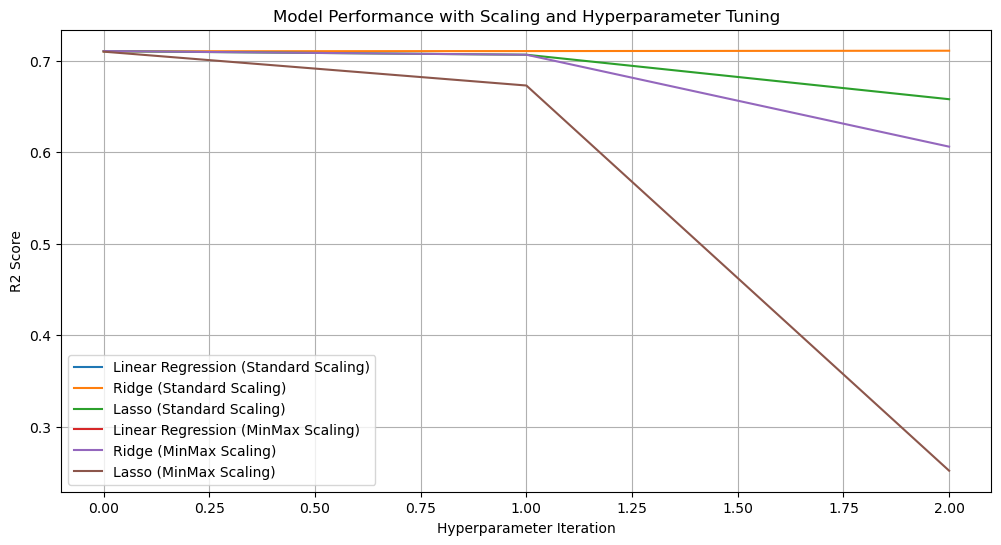


Test Set Results:

Standard Scaling:
Linear Regression Test Set R2: 0.7080
Ridge Test Set R2: 0.7074
Lasso Test Set R2: 0.6867

MinMax Scaling:
Linear Regression Test Set R2: 0.7080
Ridge Test Set R2: 0.7079
Lasso Test Set R2: 0.6484


In [17]:
# Extending for hyperparameter tuning and MinMax testing

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score, KFold

# Scalers
scalers = {
    "Standard Scaling": StandardScaler(),
    "MinMax Scaling": MinMaxScaler()
}

# Models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso()
}

# Ridge and Lasso hyperparameters
ridge_alphas = [0.1, 1.0, 10.0]
lasso_alphas = [0.01, 0.1, 1.0]

# Results dictionary
results = {scaler_name: {model_name: [] for model_name in models.keys()} for scaler_name in scalers.keys()}

# K-Fold Cross-Validation
kf = KFold(n_splits=5, random_state=42, shuffle=True)

# Evaluate models with each scaler
for scaler_name, scaler in scalers.items():
    # Scale the data
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    for model_name, model in models.items():
        if model_name == "Ridge":
            # Hyperparameter tuning for Ridge
            best_score = -np.inf
            for alpha in ridge_alphas:
                model.set_params(alpha=alpha)
                cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf, scoring='r2')
                results[scaler_name][model_name].append(cv_results.mean())
        elif model_name == "Lasso":
            # Hyperparameter tuning for Lasso
            best_score = -np.inf
            for alpha in lasso_alphas:
                model.set_params(alpha=alpha)
                cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf, scoring='r2')
                results[scaler_name][model_name].append(cv_results.mean())
        else:
            # Evaluate Linear Regression
            cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf, scoring='r2')
            results[scaler_name][model_name].append(cv_results.mean())

# Visualize results
plt.figure(figsize=(12, 6))
for scaler_name, scaler_results in results.items():
    for model_name, scores in scaler_results.items():
        plt.plot(scores, label=f"{model_name} ({scaler_name})")

plt.title("Model Performance with Scaling and Hyperparameter Tuning")
plt.xlabel("Hyperparameter Iteration")
plt.ylabel("R2 Score")
plt.legend()
plt.grid(True)
plt.show()

# Test set evaluation with best hyperparameters
print("\nTest Set Results:")
for scaler_name, scaler in scalers.items():
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    print(f"\n{scaler_name}:")
    for model_name, model in models.items():
        if model_name == "Ridge":
            model.set_params(alpha=1.0)  # Best alpha from Ridge tuning
        elif model_name == "Lasso":
            model.set_params(alpha=0.1)  # Best alpha from Lasso tuning
        model.fit(X_train_scaled, y_train)
        test_score = model.score(X_test_scaled, y_test)
        print(f"{model_name} Test Set R2: {test_score:.4f}")


In [18]:
best_params = {}

for scaler_name, scaler in scalers.items():
    # Scale the data
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    for model_name, model in models.items():
        if model_name == "Ridge":
            # Tune alpha for Ridge
            best_score = -np.inf
            for alpha in ridge_alphas:
                model.set_params(alpha=alpha)
                cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf, scoring='r2')
                mean_score = cv_results.mean()
                if mean_score > best_score:
                    best_score = mean_score
                    best_params[f"{scaler_name} {model_name}"] = alpha
        elif model_name == "Lasso":
            # Tune alpha for Lasso
            best_score = -np.inf
            for alpha in lasso_alphas:
                model.set_params(alpha=alpha)
                cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf, scoring='r2')
                mean_score = cv_results.mean()
                if mean_score > best_score:
                    best_score = mean_score
                    best_params[f"{scaler_name} {model_name}"] = alpha
        else:
            # No hyperparameters for Linear Regression
            best_params[f"{scaler_name} {model_name}"] = None

# Test Set Evaluation with Best Hyperparameters
print("\nTest Set Results with Best Hyperparameters:")
for scaler_name, scaler in scalers.items():
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    print(f"\n{scaler_name}:")
    for model_name, model in models.items():
        if model_name in ["Ridge", "Lasso"]:
            alpha = best_params[f"{scaler_name} {model_name}"]
            model.set_params(alpha=alpha)
            print(f"{model_name} (Best α={alpha}): ", end="")
        model.fit(X_train_scaled, y_train)
        test_score = model.score(X_test_scaled, y_test)
        print(f"Test Set R2: {test_score:.4f}")



Test Set Results with Best Hyperparameters:

Standard Scaling:
Test Set R2: 0.7080
Ridge (Best α=10.0): Test Set R2: 0.7030
Lasso (Best α=0.01): Test Set R2: 0.7069

MinMax Scaling:
Test Set R2: 0.7080
Ridge (Best α=0.1): Test Set R2: 0.7085
Lasso (Best α=0.01): Test Set R2: 0.7047


3. Performance Comparison: LinearRegression achieved the highest R² score across all tests, closely followed by Ridge. Lasso showed the lowest performance, with a noticeable drop in R² compared to the other models, particularly under MinMax scaling.

4. Impact of Standard Scaling: Applying standard scaling had a minimal impact on LinearRegression and Ridge, with only a slight improvement in Ridge's performance. Lasso benefitted more significantly from standard scaling, improving its R² score compared to the unscaled data.

5. Impact of MinMax Scaling: MinMax scaling had negligible impact on LinearRegression and Ridge, with scores almost identical to those from standard scaling. However, Lasso's performance declined under MinMax scaling, resulting in the lowest R² scores among all tested configurations.


##### b)
Print the following:  
- All slope coefficients (weights).  
- The column number with the largest absolute slope coefficient and the value of this coefficient.  
- The intercept.  
- The score on the test set.  

**Evaluation:**  
- Which class produces the best score?  
- How do the slope coefficients differ after applying each class?  
- Does the result change when scaling the training and test data beforehand?

---

#### **Level 2**
##### a)
1. Generate 1000 data points approximately following a parabola with noise.  
2. Split the data into training and test sets. (Random selection is not required; slicing can be used.)  
3. Perform a standard linear regression.  
4. Test the prediction quality by calculating the score.  
5. The score is a function within the predefined class.  
6. Plot the predicted line and the test data.  

##### d)
1. Reproduce the code from Frochte and create a class with `fit` and `predict` methods.  
2. Can you observe differences in speed between this custom class and the one from scikit-learn?  
3. Add a new column to the dataset containing the square of the data values.  
   (This does not require `PolynomialFeatures`; you can use `np.hstack`.)  
4. What coefficients does the regression produce?  
5. Test the prediction quality by calculating the score.  
6. Plot the predicted line and the test data.  

---

#### **Level 3**
##### a)
1. Import the `LogisticRegression` class.  
2. Apply it to the dataset related to bladder infections and compare the score with the Naive Bayes classes.  

##### b)
1. Perform the same task using the `RidgeClassifier` class.  
2. Which class achieves a better score?  
3. Which class is faster?